# Regression Tree 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data = pd.read_csv('C:/Users/Dell/Downloads/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
col = data.columns
col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

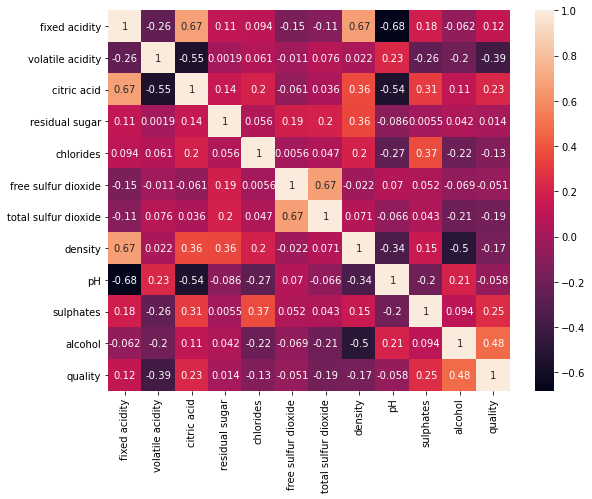

In [6]:
cor_ = data.corr()
plt.figure(figsize = (9,7))
sns.heatmap(cor_, annot = True)
plt.show()

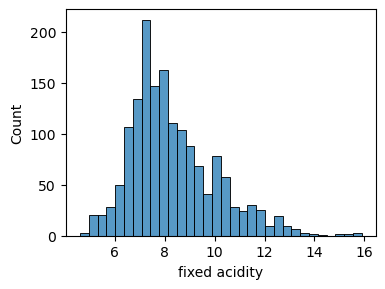

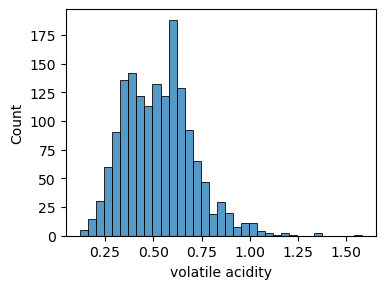

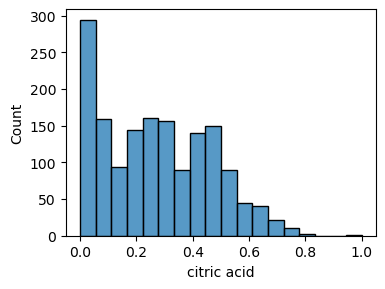

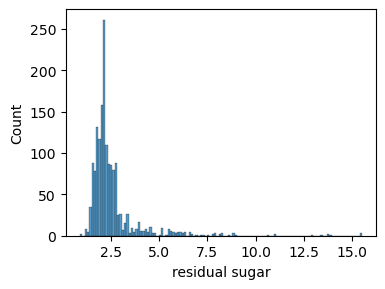

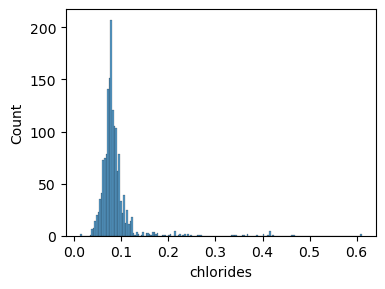

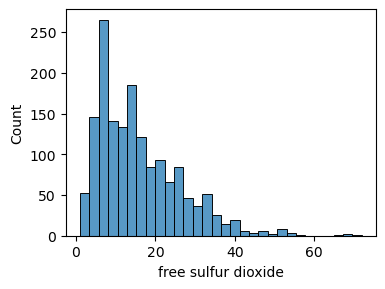

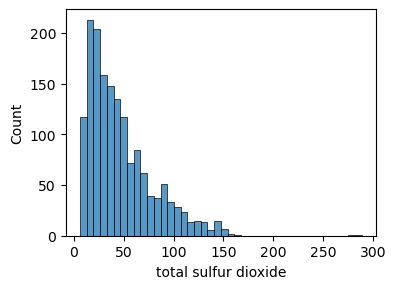

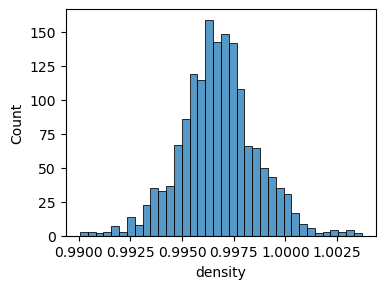

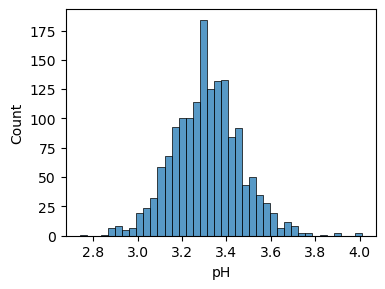

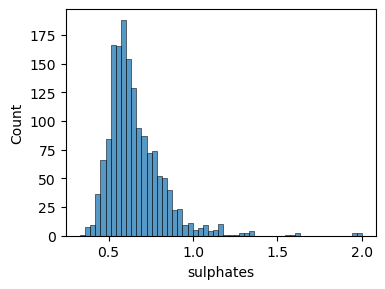

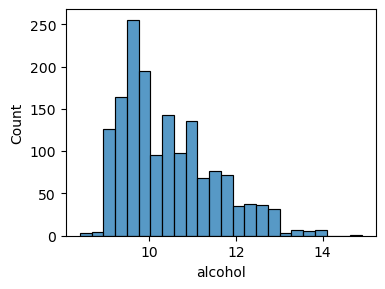

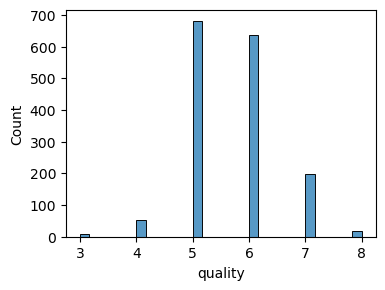

In [7]:
# Visualization
for i in col:
    plt.figure(figsize = (4,3), dpi = 100)
    sns.histplot(data[i])
    plt.xlabel(i)
    plt.ylabel
    plt.show()



In [8]:
# Splitting the data

x = data.drop(['quality'],axis = 1)
y = data['quality']


from sklearn.model_selection import train_test_split
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size =0.2)
x_tr.shape, x_test.shape, y_tr.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [9]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
reg = regressor.fit(x_tr, y_tr)

In [10]:
# Prediction
pred = regressor.predict(x_test)
pred

array([5., 6., 5., 5., 5., 6., 6., 7., 5., 4., 6., 7., 6., 7., 5., 6., 5.,
       5., 6., 5., 5., 5., 5., 5., 6., 5., 5., 7., 5., 8., 6., 6., 7., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 5., 5., 7., 5., 6., 5.,
       5., 5., 6., 6., 5., 4., 5., 6., 6., 6., 7., 5., 7., 5., 6., 6., 5.,
       5., 6., 6., 4., 4., 6., 6., 6., 6., 5., 6., 6., 3., 7., 6., 6., 5.,
       5., 6., 7., 6., 6., 6., 5., 6., 5., 6., 7., 5., 5., 6., 6., 5., 5.,
       6., 5., 6., 6., 5., 5., 6., 5., 6., 6., 5., 6., 6., 5., 5., 5., 7.,
       6., 5., 6., 5., 6., 4., 6., 7., 5., 6., 6., 7., 5., 5., 6., 6., 5.,
       6., 6., 6., 5., 6., 7., 6., 5., 6., 5., 5., 6., 5., 7., 5., 7., 6.,
       8., 6., 7., 5., 5., 5., 6., 5., 6., 5., 7., 5., 5., 5., 6., 6., 5.,
       7., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 5., 6., 6., 5., 7., 5.,
       6., 5., 5., 5., 5., 5., 6., 6., 5., 5., 6., 6., 7., 6., 6., 5., 5.,
       5., 5., 5., 6., 6., 5., 6., 5., 5., 6., 5., 6., 5., 5., 5., 4., 5.,
       7., 6., 6., 7., 5.

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.678125

In [12]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.14      0.08      0.11        12
         5.0       0.71      0.74      0.72       130
         6.0       0.70      0.72      0.71       138
         7.0       0.64      0.57      0.60        37
         8.0       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.37      0.35      0.36       320
weighted avg       0.67      0.68      0.67       320



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number of leaves in default decision tree: 348


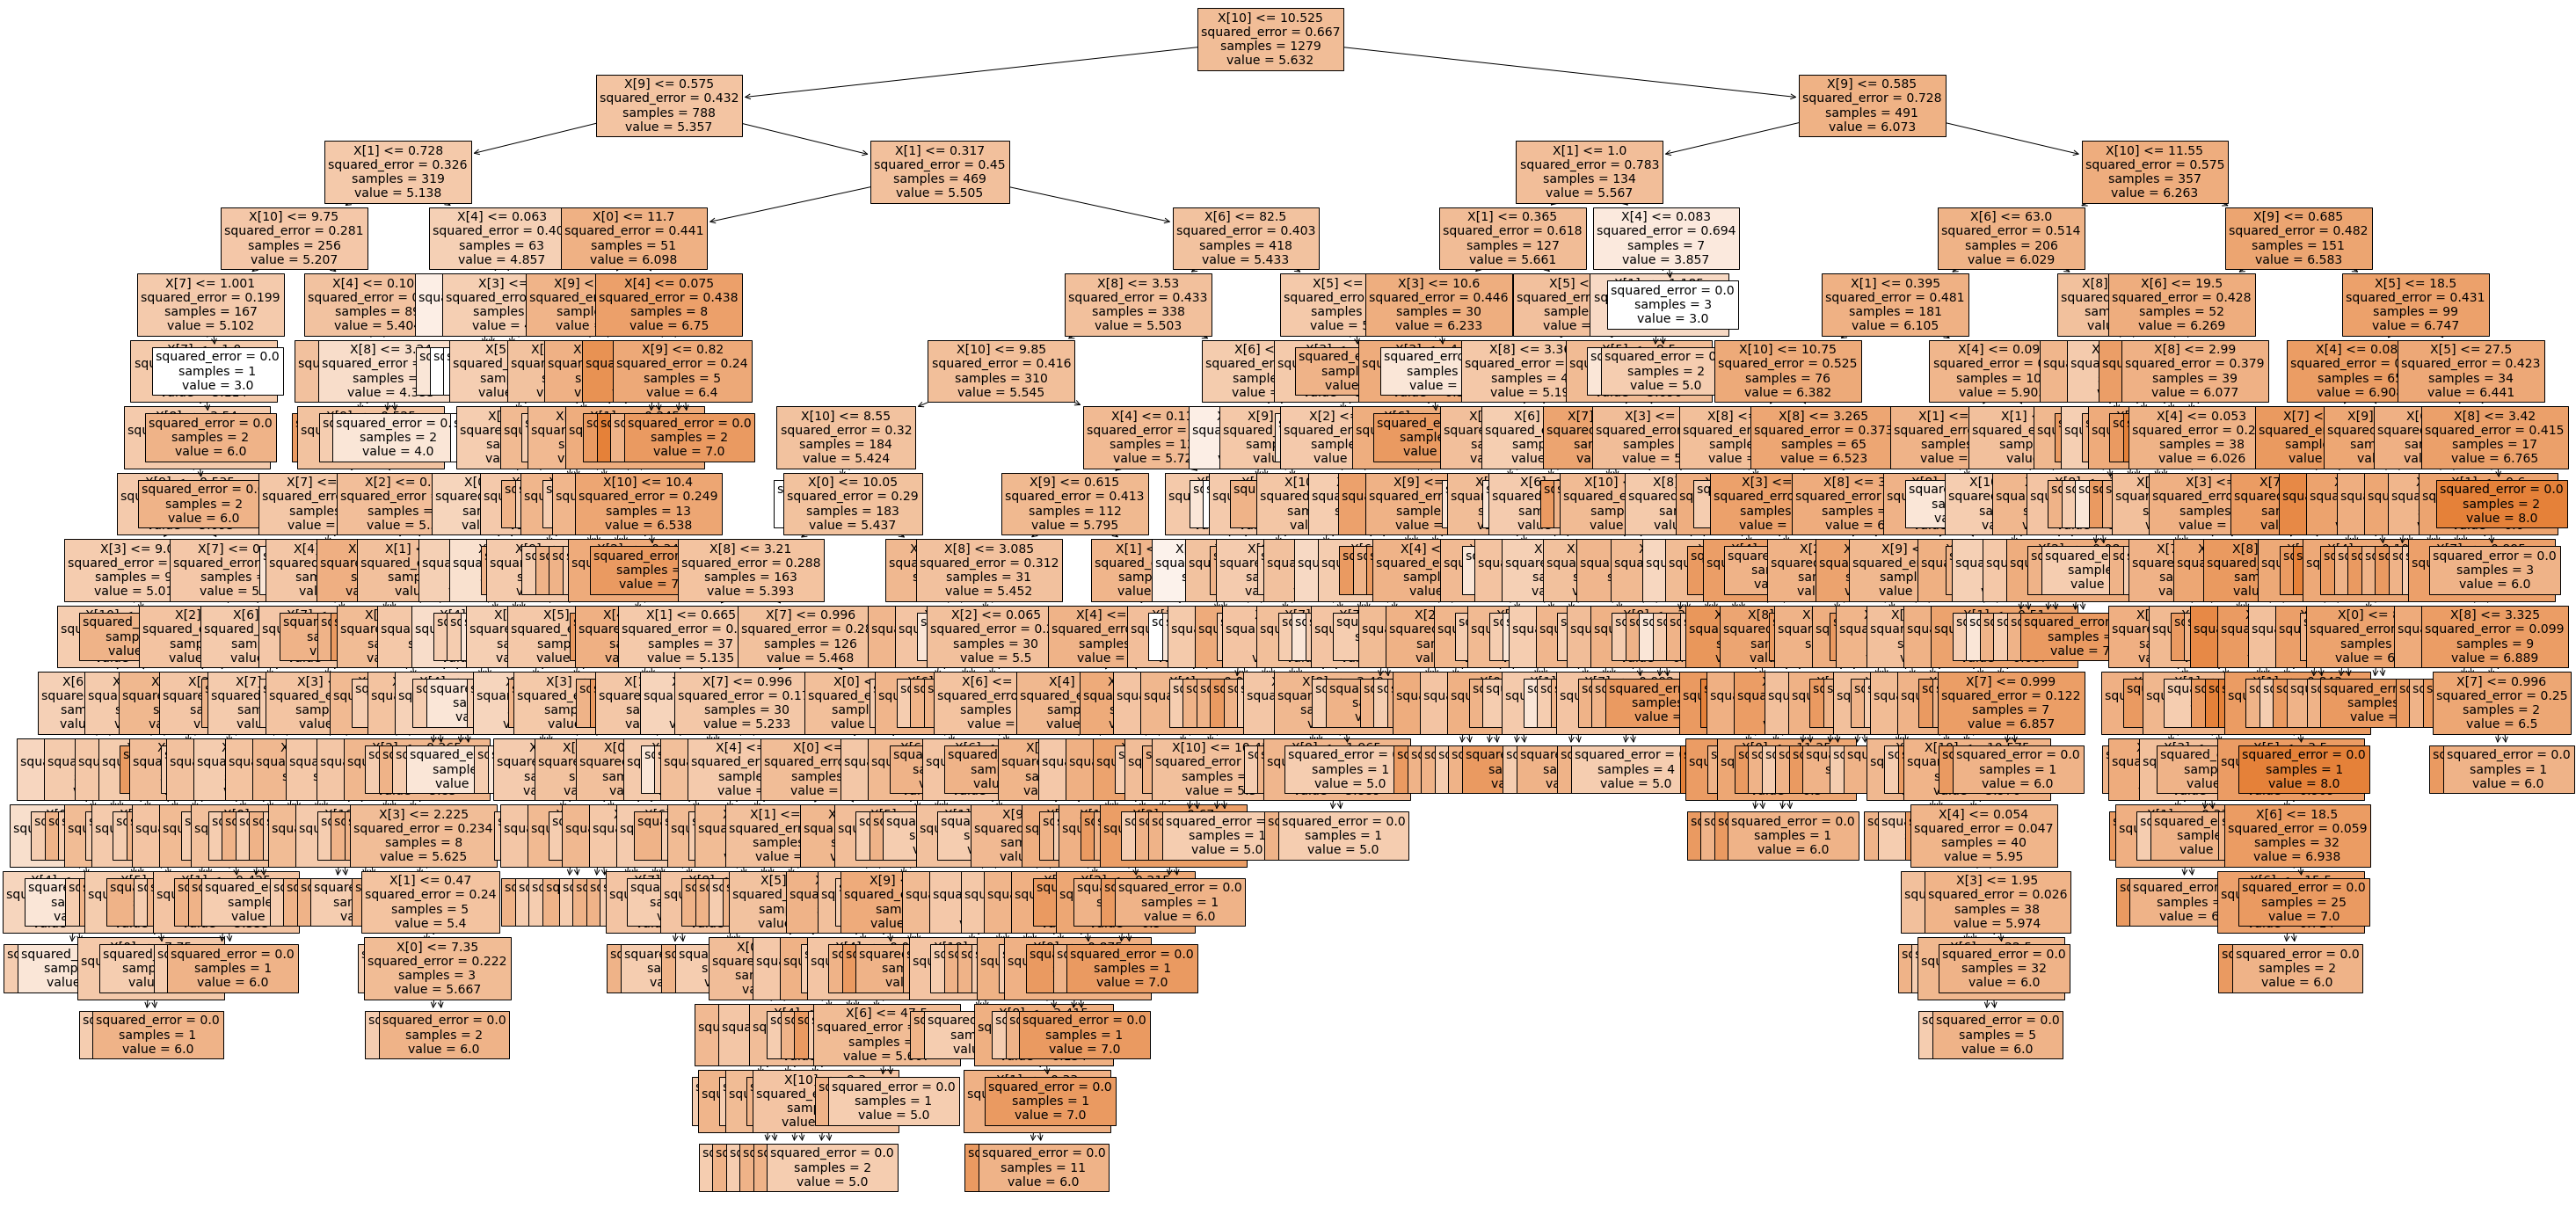

In [13]:
# plotting teh tree
from sklearn.tree import plot_tree
print('Number of leaves in default decision tree: ' + str(reg.get_n_leaves()))
plt.figure(figsize=(50,25))
plot_tree(reg, filled=True, fontsize=14)
plt.show()

# Random Forests

In [25]:
data = pd.read_csv('C:/Users/Dell/Downloads/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


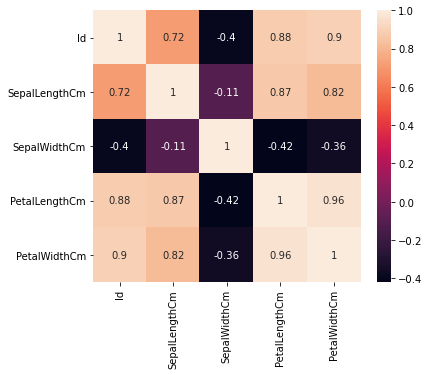

In [27]:
iris = data.corr()
plt.figure(figsize = (6,5))
sns.heatmap(iris, annot = True)
plt.show()

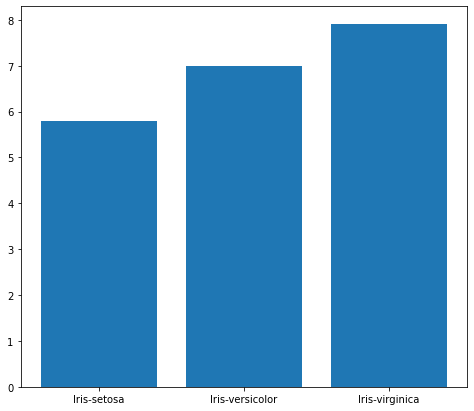

In [28]:
plt.figure( figsize = (8,7))
plt.bar(data['Species'], data['SepalLengthCm'])
plt.show()

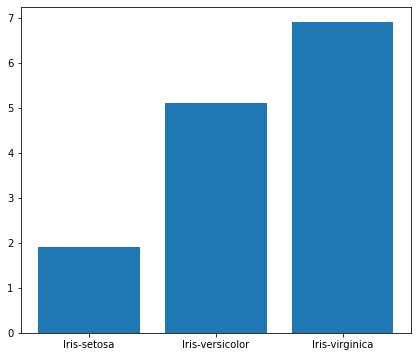

In [29]:
plt.figure( figsize = (7,6))
plt.bar(data['Species'], data['PetalLengthCm'])
plt.show()

In [30]:
data.drop('Id', axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [32]:
x = data.drop(['Species'],axis = 1)
y = data['Species']


from sklearn.model_selection import train_test_split
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size =0.2)
x_tr.shape, x_test.shape, y_tr.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators = 10)
rf_class.fit(x_tr, y_tr)

RandomForestClassifier(n_estimators=10)

In [34]:
pred_rf = rf_class.predict(x_test)

In [35]:
print(classification_report(y_test, pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.71      0.83      0.77         6
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.90        30
      macro avg       0.87      0.89      0.88        30
   weighted avg       0.91      0.90      0.90        30

